# Main Modelling Notebook

David Modjeska and Andrew Greene

This notebook contains the actual models that we are using for this project.

In [1]:
# Begin with all the necessary imports

import itertools as it
import matplotlib
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import os.path as op
import pandas as pd
import re
import scipy as sp
import sklearn.preprocessing as Preprocessing
import datetime

from itertools import combinations
from sklearn.cross_validation import KFold as kfold
from sklearn.decomposition import TruncatedSVD as tSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import LogisticRegression as Log_Reg
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
from scipy.io import mmread

%matplotlib inline
plt.style.use('ggplot') 
from IPython.display import display, HTML

#### Load Data

The loading (which also handles filtering, standardizing, one-hot-encoding, etc.) occurs in a separate module for clarity's sake. Please see `Data_Loading.ipynb`, which is used to automatically generate `data_loading.py`

In [2]:
# load data
%run -i data_loading.py

248445
113036


/Users/davidmodjeska/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Indexes computed

address_state object
annual_income float64
cpi float64
delinq_2_yrs int64
desc_len float64
dti float64
employ_length object
gdp float64
home_owner object
initial_list_status object
inquiry_6_mos int64
loan_amount int64
loan_purpose object
loan_term int64
months_since_last_record float64
open_accounts int64
revol_util float64
rir float64
total_accounts int64
unemploy float64
verif_status object
months_since_earliest_credit float64
emp_cleaned object
(Training set has 28182 rows)

address_state object
annual_income float64
cpi float64
delinq_2_yrs int64
desc_len float64
dti float64
employ_length object
gdp float64
home_owner object
initial_list_status object
inquiry_6_mos int64
loan_amount int64
loan_purpose object
loan_term int64
months_since_last_record float64
open_accounts int64
revol_util float64
rir float64
total_accounts int64
unemploy float64
verif_status object
months_since_earliest_credit float64
emp_cleaned object
(Test set has 84854 rows)
address_state objec

#### Set up Modelling Framework

Again, the framework is defined in an external module so it can be reused in various notebooks. Please see `Modelling_Framework.ipynb` from which `modelling_framework.py` is generated.

In [3]:
# set up modelling framework
% run -i modelling_framework.py

#### Sanity-checking the data

A reminder that initial data exploration occurs in the `amg_explore.ipynb` notebook. Here we are summarizing the properties of the data that have been loaded to establish benchmarks for our report.

In [12]:
# What is our sample size broken out by outcome?
y.value_counts()

True     23897
False     4285
Name: loan_status, dtype: int64

In [13]:
# As a result, what is our frequency of outcome?
y.mean()

0.84795259385423316

### Models without PCA

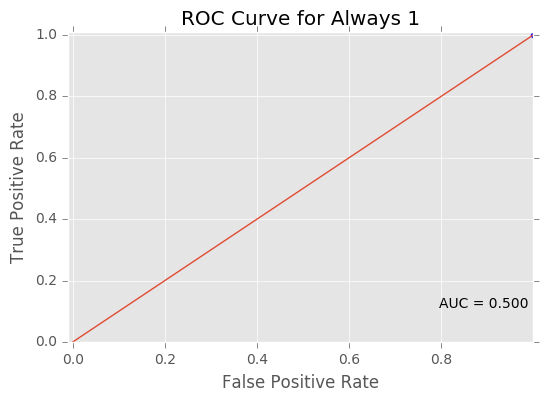

all   score: 0.848  baseline: 0.848   prec: nan   f1: 0.918  | test score 0.848  prec nan f1 0.000  GP -915MM
2011  score: 0.896  baseline: 0.896   prec: nan   f1: 0.945  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec nan
2013  score: 0.822  baseline: 0.822   prec: nan   f1: 0.902  | test score 0.824  prec nan


DummyClassifier(constant=1, random_state=None, strategy='constant')

In [14]:
# Simplest possible model: always assume the majority outcome. 
eval_model_by_year(lambda: DummyClassifier(strategy='constant', constant=1), model_name='Always 1')

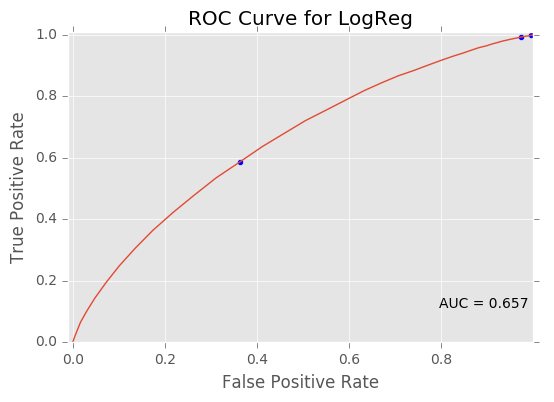

all   score: 0.848  baseline: 0.848   prec: 0.556   f1: 0.918  | test score 0.848  prec 0.564 f1 0.002  GP -913MM
2011  score: 0.894  baseline: 0.896   prec: nan   f1: 0.944  | test score 0.893  prec 0.600
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec 0.800
2013  score: 0.822  baseline: 0.822   prec: 0.454   f1: 0.902  | test score 0.823  prec 0.585


In [15]:
# Simplest approach is a naive Logistic Regression model
_ = eval_model_by_year(lambda: Log_Reg(), model_name='LogReg')

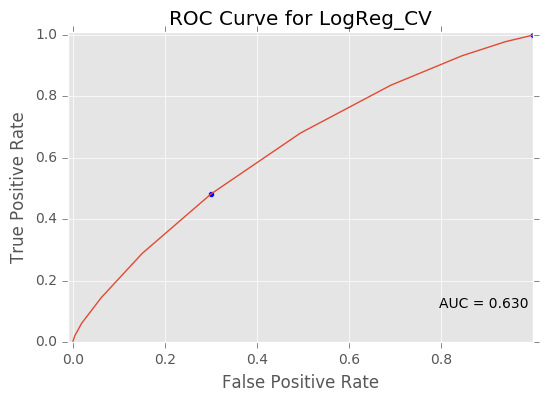

all   score: 0.848  baseline: 0.848   prec: nan   f1: 0.918  | test score 0.848  prec nan f1 0.000  GP -915MM
2011  score: 0.896  baseline: 0.896   prec: nan   f1: 0.945  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec nan
2013  score: 0.822  baseline: 0.822   prec: nan   f1: 0.902  | test score 0.824  prec 0.550
C= 0.0001


dti                                    -0.056826
revol_util                             -0.055701
annual_income                           0.047845
inquiry_6_mos                          -0.045184
cpi                                    -0.041426
gdp                                    -0.039468
rir                                    -0.029272
total_accounts                          0.028092
home_owner__MORTGAGE                    0.024625
home_owner__RENT                       -0.022464
months_since_earliest_credit            0.020701
delinq_2_yrs                           -0.016794
loan_purpose__credit_card               0.012470
open_accounts                          -0.011015
desc_len                                0.010777
employ_length__n/a                     -0.009203
employ_length__10                       0.008915
verif_status__Verified                 -0.007593
loan_amount                             0.007152
loan_purpose__other                    -0.006163
verif_status__Not_Ve

In [16]:
# But a more appropriate one uses cross-validation
logregcv_model = eval_model_by_year(lambda: Log_Reg_CV(), model_name='LogReg_CV')

# We want to know what value of C was selected by the cross-validation
print "C=", logregcv_model.C_[0]

# And we want to know which predictors are important; we do this by sorting them
# by the absolute value of their coefficients
lr_coeff = pd.DataFrame(logregcv_model.coef_.T, index=x_expanded.columns)
lr_coeff.columns = ['coeff']
lr_coeff['abs'] = lr_coeff.coeff.abs()
lr_coeff.sort_values('abs', ascending=False).coeff

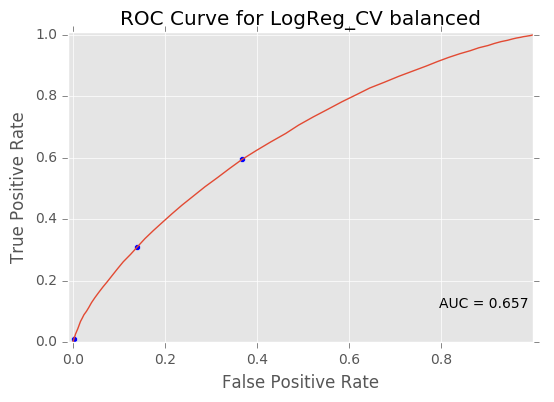

all   score: 0.607  baseline: 0.848   prec: 0.780   f1: 0.723  | test score 0.600  prec 0.782 f1 0.534  GP 13MM
2011  score: 0.621  baseline: 0.896   prec: 0.852   f1: 0.748  | test score 0.625  prec 0.845
2012  score: 0.596  baseline: 0.866   prec: 0.814   f1: 0.719  | test score 0.592  prec 0.823
2013  score: 0.618  baseline: 0.822   prec: 0.739   f1: 0.726  | test score 0.610  prec 0.749
C= 0.00599484250319


annual_income                           0.459223
loan_purpose__small_business           -0.343971
loan_purpose__credit_card               0.339828
employ_length__n/a                     -0.261436
revol_util                             -0.258278
emp_cleaned__                          -0.249169
inquiry_6_mos                          -0.197481
employ_length__1                        0.177445
cpi                                    -0.172602
loan_purpose__other                    -0.166542
loan_purpose__debt_consolidation        0.161694
address_state__CO                       0.152645
address_state__FL                      -0.149291
open_accounts                          -0.148040
home_owner__MORTGAGE                    0.144057
total_accounts                          0.142046
home_owner__RENT                       -0.131421
loan_purpose__major_purchase            0.128225
loan_purpose__moving                   -0.127842
dti                                    -0.125102
address_state__MA   

In [17]:
# But an even more appropriate one is (a) use cross-validation, and (b) use balanced weights
logregcv_model = eval_model_by_year(lambda: Log_Reg_CV(class_weight='balanced'), model_name='LogReg_CV balanced')

# We want to know what value of C was selected by the cross-validation
print "C=", logregcv_model.C_[0]

# And we want to know which predictors are important; we do this by sorting them
# by the absolute value of their coefficients
lr_coeff = pd.DataFrame(logregcv_model.coef_.T, index=x_expanded.columns)
lr_coeff.columns = ['coeff']
lr_coeff['abs'] = lr_coeff.coeff.abs()
lr_coeff.sort_values('abs', ascending=False).coeff

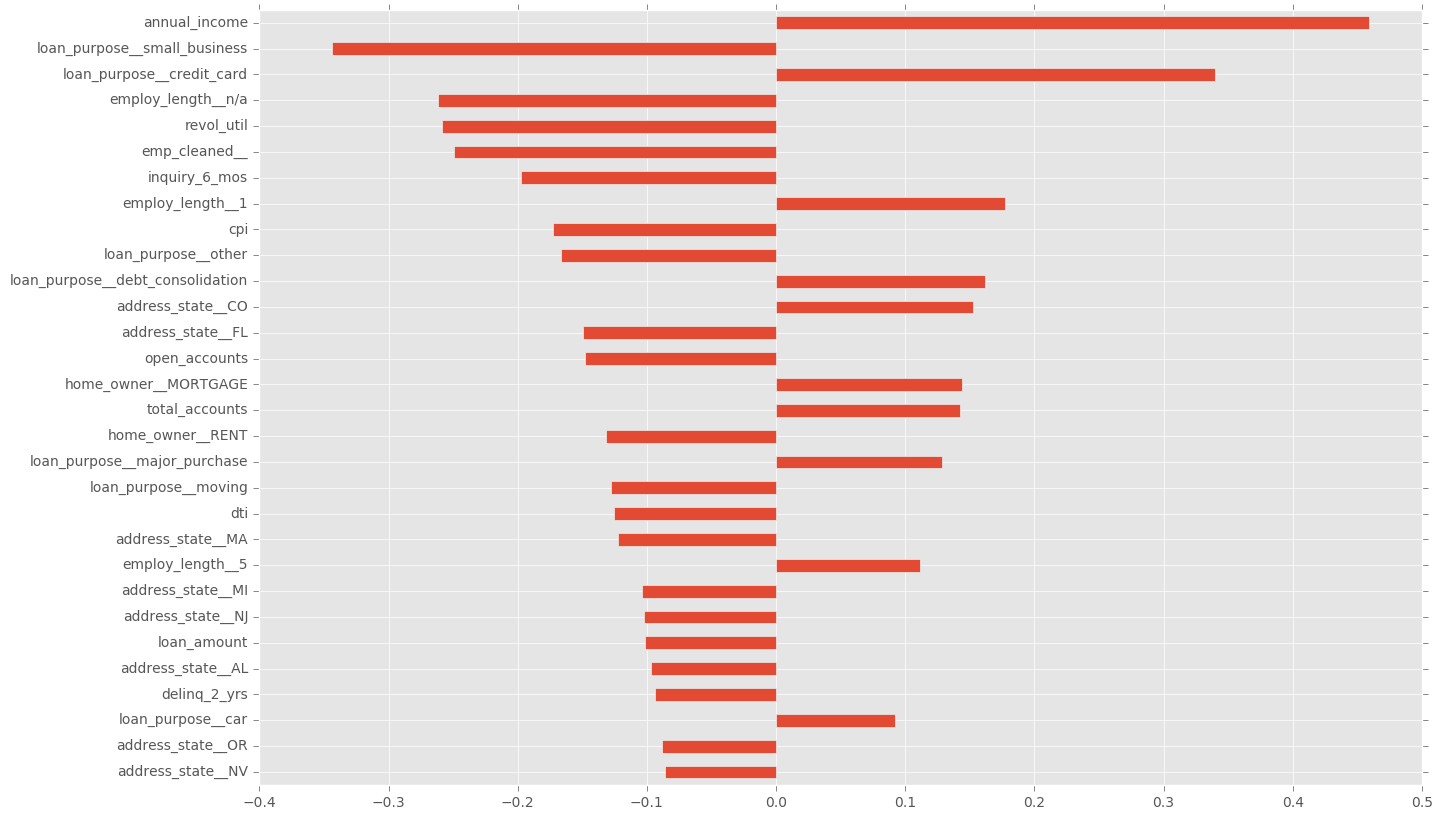

In [18]:
plt.figure(figsize=(15,10))
lr_coeff.sort_values('abs', ascending=False).coeff[0:30][::-1].plot(kind='barh')
plt.show()

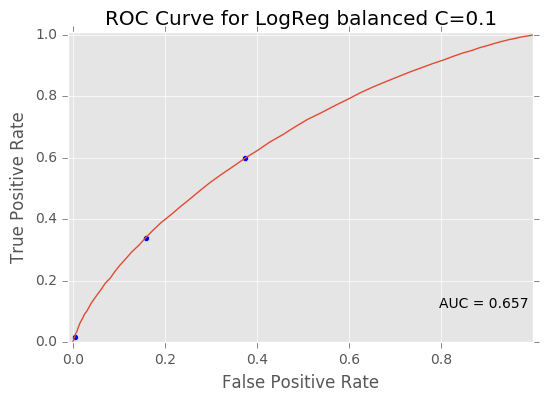

all   score: 0.605  baseline: 0.848   prec: 0.781   f1: 0.721  | test score 0.603  prec 0.782 f1 0.530  GP 5MM


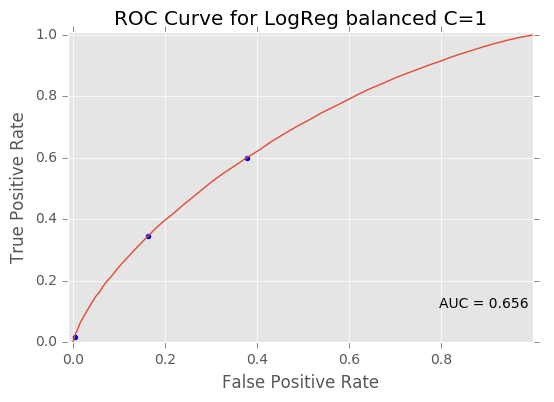

all   score: 0.607  baseline: 0.848   prec: 0.780   f1: 0.723  | test score 0.604  prec 0.782 f1 0.529  GP 3MM


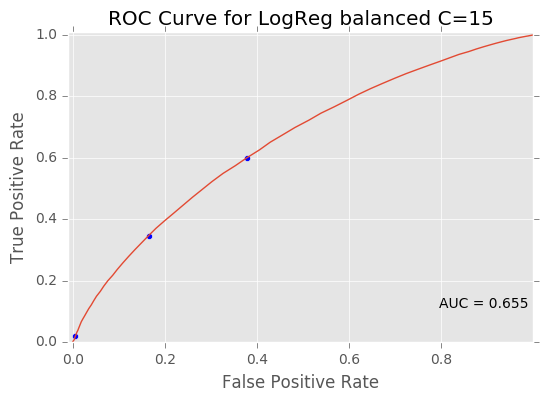

all   score: 0.607  baseline: 0.848   prec: 0.780   f1: 0.723  | test score 0.603  prec 0.782 f1 0.529  GP 3MM


In [19]:
for C in (0.1, 1, 15):
    eval_model_all_years(lambda: Log_Reg(class_weight='balanced', C=C), model_name='LogReg balanced C='+str(C))

Let's examine cross-terms

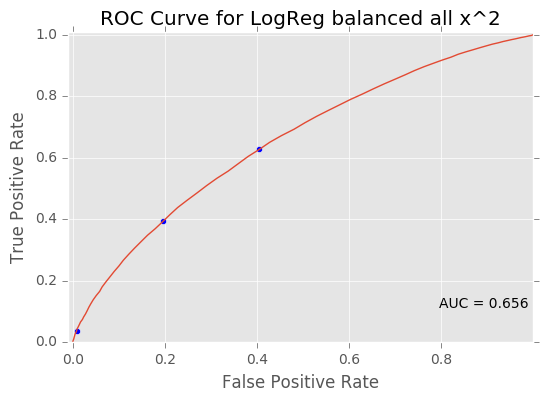

all   score: 0.626  baseline: 0.848   prec: 0.788   f1: 0.744  | test score 0.622  prec 0.778 f1 0.504  GP -65MM


In [20]:
lr_xterms = eval_model_all_years(lambda: Log_Reg_CV(class_weight='balanced'), 
                                 poly_degree = 2,
                                 # columns = ['loan_amount', 'installment', 'home_owner', 'loan_purpose', 'address_state'],
                                 model_name='LogReg balanced all x^2')

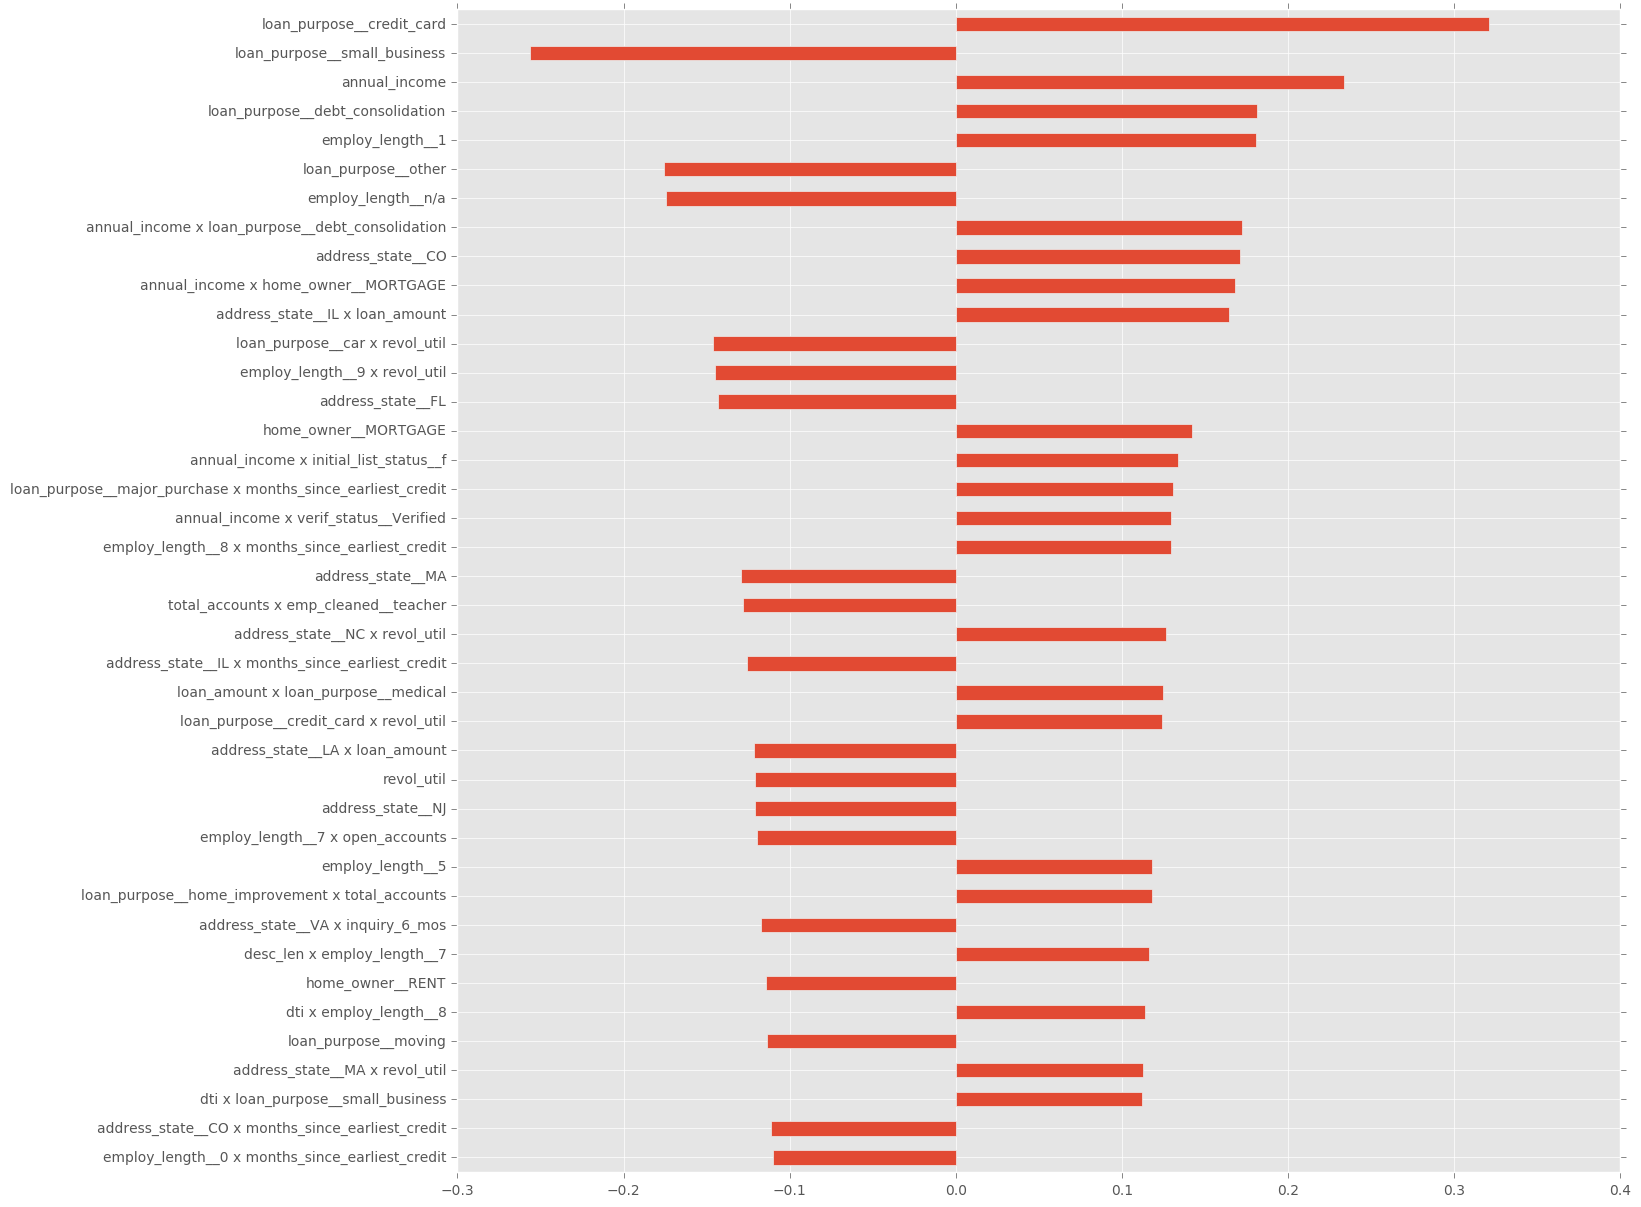

In [21]:
# And we want to know which predictors are important; we do this by sorting them
# by the absolute value of their coefficients
lr_coeff = pd.DataFrame(lr_xterms.coef_.T, index=cross_term_names(x_expanded, 2))
lr_coeff.columns = ['coeff']
lr_coeff['abs'] = lr_coeff.coeff.abs()
plt.figure(figsize=(15,15))
lr_coeff.sort_values('abs', ascending=False).coeff[0:40][::-1].plot(kind='barh')
plt.show()

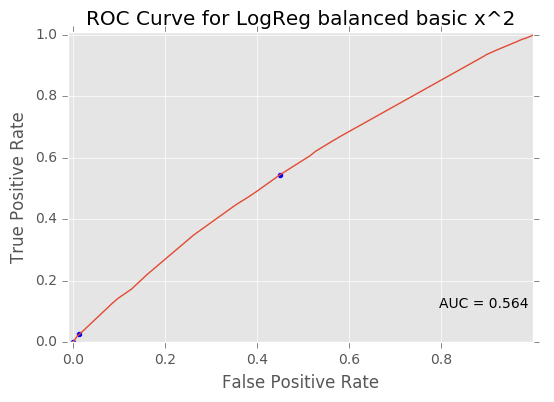

all   score: 0.545  baseline: 0.848   prec: 0.824   f1: 0.670  | test score 0.546  prec 0.822 f1 0.586  GP 45MM


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [22]:
eval_model_all_years(lambda: Log_Reg(class_weight='balanced'), 
                     poly_degree = 2,
                     columns = ['loan_amount', 'installment', 'home_owner', 'loan_purpose'],
                     model_name='LogReg balanced basic x^2')

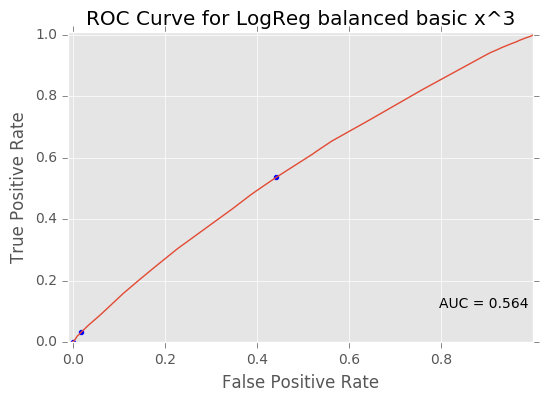

all   score: 0.535  baseline: 0.848   prec: 0.824   f1: 0.659  | test score 0.539  prec 0.823 f1 0.593  GP 31MM


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [23]:
eval_model_all_years(lambda: Log_Reg(class_weight='balanced'), 
                     poly_degree = 3,
                     columns = ['loan_amount', 'installment', 'home_owner', 'loan_purpose'],
                     model_name='LogReg balanced basic x^3')

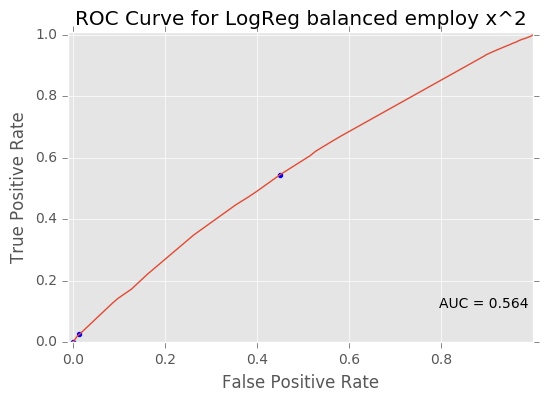

all   score: 0.545  baseline: 0.848   prec: 0.824   f1: 0.670  | test score 0.546  prec 0.822 f1 0.586  GP 45MM


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [24]:
eval_model_all_years(lambda: Log_Reg(class_weight='balanced'), 
                     poly_degree = 2,
                     columns = ['loan_amount', 'installment', 'home_owner', 'loan_purpose', 'employ_title'],
                     model_name='LogReg balanced employ x^2')

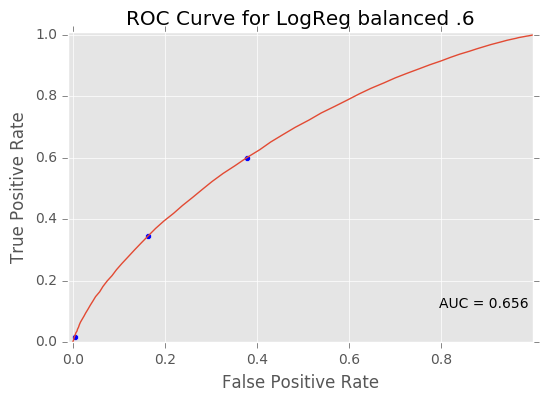

all   score: 0.607  baseline: 0.848   prec: 0.726   f1: 0.723  | test score 0.604  prec 0.734 f1 0.281  GP -493MM
2011  score: 0.628  baseline: 0.896   prec: 0.838   f1: 0.754  | test score 0.624  prec 0.816
2012  score: 0.595  baseline: 0.866   prec: 0.781   f1: 0.718  | test score 0.593  prec 0.802
2013  score: 0.617  baseline: 0.822   prec: 0.690   f1: 0.725  | test score 0.610  prec 0.702


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [25]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), prob_threshold=.6, model_name='LogReg balanced .6')

/Users/davidmodjeska/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


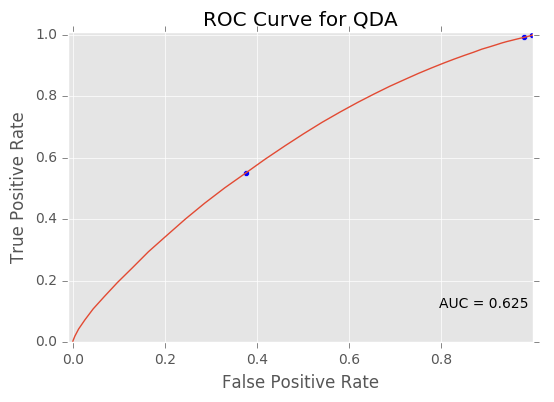

all   score: 0.848  baseline: 0.848   prec: 0.756   f1: 0.917  | test score 0.848  prec 0.747 f1 0.002  GP -913MM
2011  score: 0.896  baseline: 0.896   prec: nan   f1: 0.945  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec nan
2013  score: 0.820  baseline: 0.822   prec: 0.666   f1: 0.901  | test score 0.822  prec 0.703


QuadraticDiscriminantAnalysis(priors=None, reg_param=1,
               store_covariances=False, tol=0.0001)

In [26]:
eval_model_by_year(lambda: QDA(reg_param = 1), model_name='QDA')

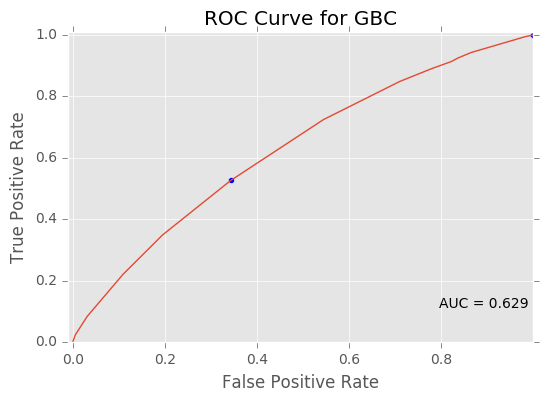

all   score: 0.848  baseline: 0.848   prec: nan   f1: 0.918  | test score 0.848  prec nan f1 0.000  GP -915MM
2011  score: 0.896  baseline: 0.896   prec: nan   f1: 0.945  | test score 0.892  prec 0.867
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.865  prec nan
2013  score: 0.822  baseline: 0.822   prec: nan   f1: 0.902  | test score 0.824  prec nan


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [27]:
eval_model_by_year(lambda: GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1), model_name='GBC')

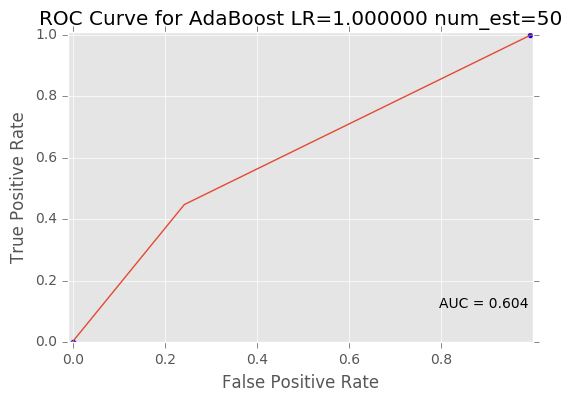

all   score: 0.847  baseline: 0.848   prec: 0.620   f1: 0.917  | test score 0.848  prec 0.539 f1 0.003  GP -912MM


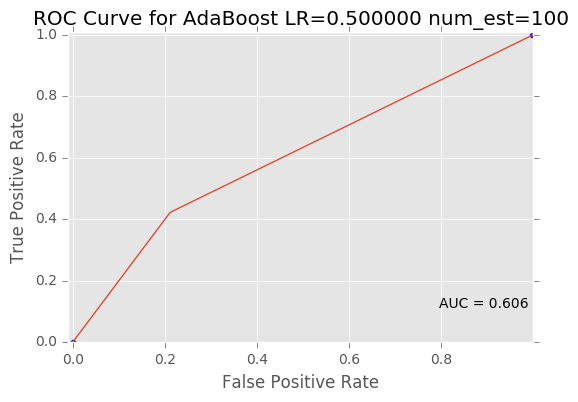

all   score: 0.848  baseline: 0.848   prec: nan   f1: 0.918  | test score 0.848  prec 0.600 f1 0.001  GP -914MM


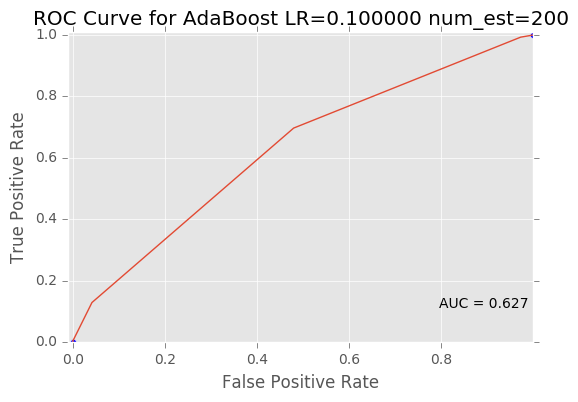

all   score: 0.848  baseline: 0.848   prec: nan   f1: 0.918  | test score 0.848  prec nan f1 0.000  GP -915MM


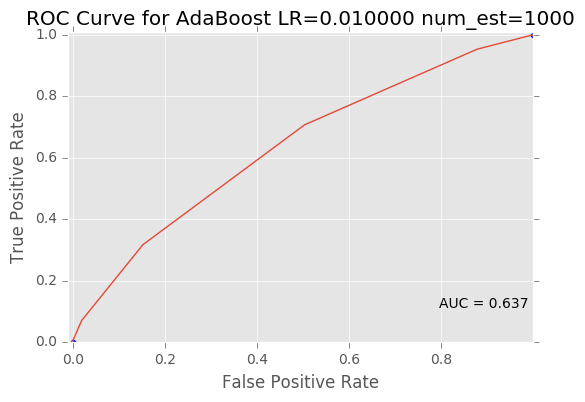

all   score: 0.848  baseline: 0.848   prec: nan   f1: 0.918  | test score 0.848  prec nan f1 0.000  GP -915MM


KeyboardInterrupt: 

In [28]:
from sklearn.ensemble import AdaBoostClassifier
for num_est, l_rate in ((50, 1.0), (100, 0.5), (200, 0.1), (1000, 0.01), (10000, 0.001)):
    eval_model_all_years(lambda: AdaBoostClassifier(random_state=1729, n_estimators=num_est, learning_rate = l_rate),
                        model_name = 'AdaBoost LR=%f num_est=%d' % (l_rate, num_est,))

In [29]:
pd.DataFrame(model_performance).T.sort_values('test_prec', ascending=False)

,auc,baseline,f1,prec,score,test_f1,test_prec,test_profit,test_score
LogReg balanced basic x^3,0.564158,0.847953,0.659433,0.823989,0.535093,0.593443,0.822941,31.757548,0.539385
LogReg balanced basic x^2,0.563748,0.847953,0.670414,0.823727,0.545276,0.585755,0.822404,45.756872,0.545796
LogReg balanced employ x^2,0.563748,0.847953,0.670414,0.823727,0.545276,0.585755,0.822404,45.756872,0.545796
LogReg balanced C=15,0.655080,0.847953,0.722553,0.780111,0.606770,0.529281,0.782483,3.407746,0.603413
LogReg balanced C=1,0.655584,0.847953,0.722665,0.780103,0.606877,0.528969,0.782289,3.064922,0.603708
LogReg_CV balanced,0.656792,0.847953,0.722663,0.780098,0.606877,0.533929,0.781949,13.870466,0.600361
LogReg balanced C=0.1,0.656841,0.847953,0.720568,0.781220,0.604570,0.529524,0.781844,5.728478,0.603495
LogReg balanced all x^2,0.655644,0.847953,0.744009,0.788099,0.625683,0.503987,0.778019,-65.285011,0.622375
QDA,0.625398,0.847953,0.917445,0.755714,0.847527,0.001804,0.747126,-913.708314,0.847845
LogReg balanced .6,0.655584,0.847953,0.722665,0.726471,0.606877,0.281042,0.733912,-493.265299,0.603708


In [30]:
eval_model_by_year(lambda: RFC(random_state=1729, max_depth=5, n_estimators=300), model_name='RFC 5/300')

KeyboardInterrupt: 

In [31]:
eval_model_by_year(lambda: RFC(random_state=1729, max_depth=5, class_weight = 'balanced', n_estimators=300),
                   model_name='RFC balanced 5/300')

KeyboardInterrupt: 

In [32]:
for max_depth in range(2, 10):
  for max_features in ['sqrt']: # + list(np.arange(0.1, 0.91, 0.5)):
    for class_weight in ('balanced',): # None
      eval_model_all_years(lambda: RFC(random_state=1729, 
                                     max_depth=max_depth, 
                                     max_features=max_features,
                                     class_weight = class_weight,
                                     n_estimators=200),
                         model_name='RFC ' + (class_weight or 'unbalanced') + 
                                 ' ' + str(max_depth) + '/' + str(max_features) + '/200')  # TODO: other hyperparams

KeyboardInterrupt: 

In [33]:
for max_depth in range(4, 10):
    for poly_degree in range(2, 5):
        eval_model_all_years(lambda: RFC(random_state=1729, 
                                     max_depth=max_depth, 
                                     class_weight = 'balanced',
                                     n_estimators=200),
                             x = cross_terms(x_expanded, poly_degree),
                             x_test = cross_terms(x_test_expanded, poly_degree),
                             model_name='RFC balanced ^' + str(poly_degree) + " to " 
                                 ' ' + str(max_depth) + '/200')

KeyboardInterrupt: 

In [34]:
eval_model_by_year(lambda: DTC(max_depth = 10, max_features = 'log2', class_weight = 'balanced', criterion = 'gini'),
                  model_name='DTC log2 balanced')

KeyboardInterrupt: 

In [35]:
eval_model_by_year(lambda: DTC(max_depth = 20, max_features = 'sqrt', class_weight = 'balanced', criterion = 'entropy'),
                  model_name='DTC sqrt balanced')

KeyboardInterrupt: 

In [ ]:
eval_model_by_year(lambda: DTC(max_depth = 20, max_features = None, class_weight = 'balanced', criterion = 'entropy'),
                  model_name='DTC')

KeyboardInterrupt: 

In [ ]:
# This takes a very long time but is the winner
eval_model_all_years(lambda: SVC(class_weight='balanced', probability=True))

In [ ]:
# This takes a very long time but is the winner
# Let's add in some different values for the hyperparam
for C in 10 ** np.arange(-2.0, 2.0, 0.5):
    print C, datetime.datetime.now()
    eval_model_all_years(lambda: SVC(class_weight='balanced', probability=True),
                        model_name="SVC " + str(C))
print "done", datetime.datetime.now()

In [ ]:
# This takes a very long time but is the winner
# Let's add in some different values for the hyperparam
for C in (100, ):
    print C, datetime.datetime.now()
    eval_model_all_years(lambda: SVC(class_weight='balanced', probability=True),
                        model_name="SVC " + str(C))
print "done", datetime.datetime.now()

#### Other Models without PCA

In [ ]:
# TODO: Try again, this time fitting a regression against the payments received

In [ ]:
# Curious -- what are the 95 CI for the baselines?
for yr in set(years.values):
    yr_n = (years == yr).sum()
    yr_def = (y[years == yr]).sum()
    yr_p = (y[years == yr]).mean()
    yr_se = (yr_p * (1.0-yr_p) / yr_n)
    print "y=%4d   n=%4d   d=%4d   p: %.3f | %.3f | %.3f" % (yr, yr_n, yr_def, yr_p - 1.96*yr_se, yr_p, yr_p + 1.96*yr_se)

In [ ]:
# Default rate for small business is higher, right?
print y.mean()
print y[x_expanded.loan_purpose__small_business == 1].mean()

In [ ]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), ['loan_purpose__small_business'], model_name='SmallBusiness')

In [ ]:
# LogReg is doing well.. what are the largest coefficients?
lr = Log_Reg(class_weight='balanced').fit(x_expanded[years.isin([2011,2012,2013])], y[years.isin([2011,2012,2013])])
lr_coeff = pd.DataFrame(lr.coef_.T, index=x_expanded.columns)
lr_coeff.columns = ['coeff']
lr_coeff['abs'] = lr_coeff.coeff.abs()

In [ ]:
lr_coeff.sort_values('abs', ascending=False).coeff

In [ ]:
lr_probs = lr.predict_proba(x_expanded)[:,0]

In [ ]:
plt.hist(lr_probs ,bins=40)
plt.show()

In [ ]:
1 - y.groupby([int(p*20)/20.0 for p in lr_probs]).mean()

In [ ]:
# probs = eval_model_with_threshold(lambda: Log_Reg())

In [ ]:
# probs = eval_model_with_threshold(lambda: Log_Reg(class_weight='balanced'))

In [ ]:
# VERY SLOW
#probs = eval_model_with_threshold(lambda: SVC(
#        random_state=1729,
#        probability=True))

#### Models with PCA

In [ ]:
eval_model_by_year(lambda: Log_Reg(), x = x_expanded_pca, x_test = x_test_expanded_pca)

In [ ]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), x = x_expanded_pca, x_test = x_test_expanded_pca)

In [ ]:
eval_model_by_year(lambda: Log_Reg(class_weight='balanced'), prob_threshold=.6, 
                   x = x_expanded_pca, x_test = x_test_expanded_pca)

In [ ]:
eval_model_by_year(lambda: QDA(), x = x_expanded_pca, x_test = x_test_expanded_pca)

In [ ]:
eval_model_by_year(lambda: GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1),
                  x = x_expanded_pca, x_test = x_test_expanded_pca)

## NLP Modeling

#### Top Terms in Each Class

/Users/davidmodjeska/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/Users/davidmodjeska/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


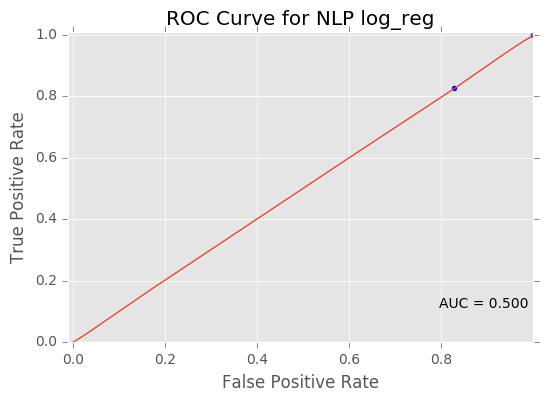

all   score: 0.860  baseline: 0.860   prec: nan   f1: 0.925  | test score 0.863  prec nan f1 0.000  GP -230MM
2011  score: 0.904  baseline: 0.904   prec: nan   f1: 0.949  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.867  prec nan
2013  score: 0.830  baseline: 0.830   prec: nan   f1: 0.907  | test score 0.837  prec nan


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [4]:
eval_model_by_year(lambda: Log_Reg(), x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test, model_name='NLP log_reg')

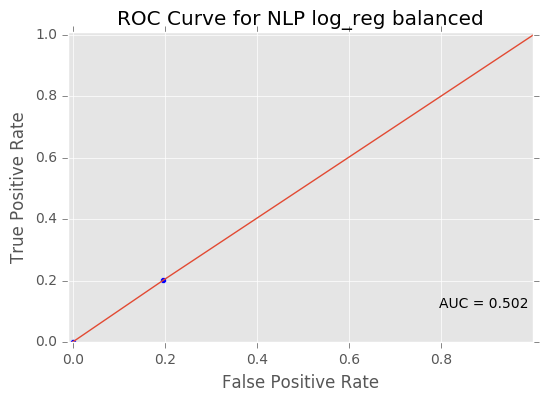

all   score: 0.296  baseline: 0.860   prec: 0.858   f1: 0.338  | test score 0.284  prec 0.862 f1 0.829  GP 198MM
2011  score: 0.628  baseline: 0.904   prec: 0.910   f1: 0.757  | test score 0.557  prec 0.875
2012  score: 0.294  baseline: 0.866   prec: 0.865   f1: 0.334  | test score 0.186  prec 0.868
2013  score: 0.511  baseline: 0.830   prec: 0.830   f1: 0.629  | test score 0.545  prec 0.838


LogisticRegression(C=1e-06, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [5]:
eval_model_by_year(lambda: Log_Reg(C = 10 ** -6, class_weight = 'balanced'), 
                   x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test, model_name='NLP log_reg balanced')

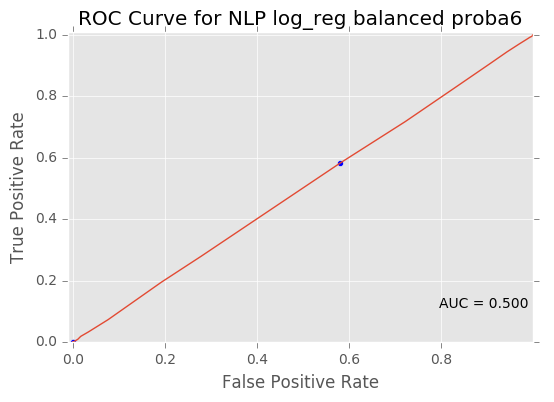

all   score: 0.565  baseline: 0.860   prec: 0.914   f1: 0.699  | test score 0.561  prec 0.826 f1 0.002  GP -230MM
2011  score: 0.478  baseline: 0.904   prec: 0.884   f1: 0.620  | test score 0.517  prec 0.921
2012  score: 0.578  baseline: 0.866   prec: 0.820   f1: 0.712  | test score 0.551  prec 0.914
2013  score: 0.527  baseline: 0.830   prec: 0.866   f1: 0.654  | test score 0.524  prec 0.759


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [6]:
eval_model_by_year(lambda: Log_Reg(class_weight = 'balanced'), prob_threshold = 0.6,
                   x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test, model_name='NLP log_reg balanced proba6')

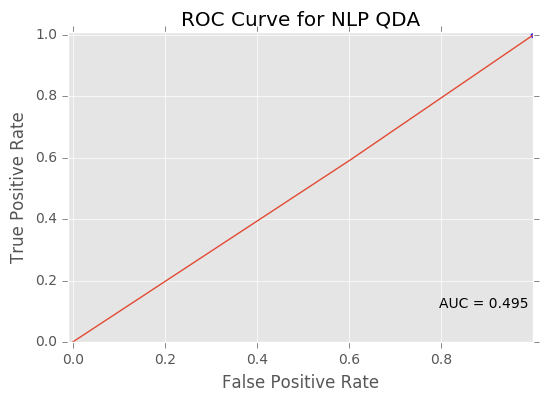

all   score: 0.860  baseline: 0.860   prec: nan   f1: 0.925  | test score 0.863  prec nan f1 0.000  GP -230MM


/Users/davidmodjeska/anaconda/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


2011  score: 0.904  baseline: 0.904   prec: nan   f1: 0.949  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.867  prec nan
2013  score: 0.830  baseline: 0.830   prec: nan   f1: 0.907  | test score 0.837  prec nan


QuadraticDiscriminantAnalysis(priors=None, reg_param=1,
               store_covariances=False, tol=0.0001)

In [7]:
eval_model_by_year(lambda: QDA(reg_param = 1), x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test, model_name='NLP QDA')

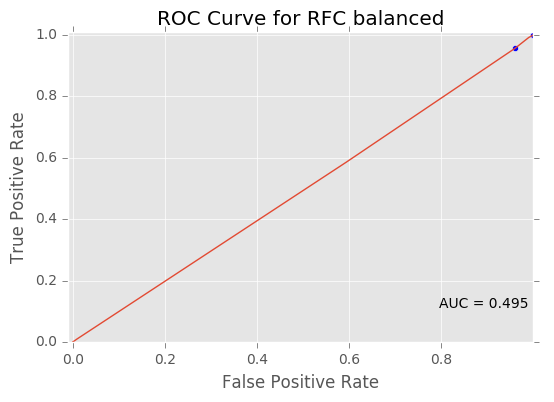

all   score: 0.860  baseline: 0.860   prec: nan   f1: 0.925  | test score 0.863  prec nan f1 0.000  GP -230MM
2011  score: 0.904  baseline: 0.904   prec: nan   f1: 0.949  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.867  prec nan
2013  score: 0.830  baseline: 0.830   prec: nan   f1: 0.907  | test score 0.837  prec nan


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=1729, verbose=0,
            warm_start=False)

In [8]:
eval_model_by_year(lambda: RFC(random_state=1729, max_depth=5, n_estimators=300),
                    x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test, model_name='RFC balanced')

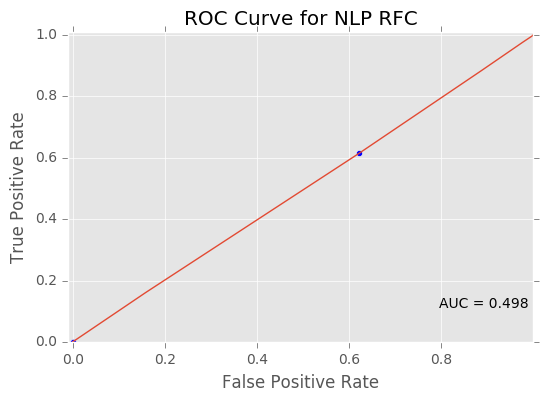

all   score: 0.582  baseline: 0.860   prec: 0.860   f1: 0.716  | test score 0.582  prec 0.865 f1 0.533  GP -24MM
2011  score: 0.555  baseline: 0.904   prec: 0.903   f1: 0.696  | test score 0.597  prec 0.885
2012  score: 0.632  baseline: 0.866   prec: 0.864   f1: 0.761  | test score 0.602  prec 0.872
2013  score: 0.534  baseline: 0.830   prec: 0.830   f1: 0.661  | test score 0.558  prec 0.838


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=1729, verbose=0,
            warm_start=False)

In [9]:
eval_model_by_year(lambda: RFC(random_state=1729, max_depth=5, n_estimators=300, class_weight = 'balanced'),
                    x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test, model_name='NLP RFC')

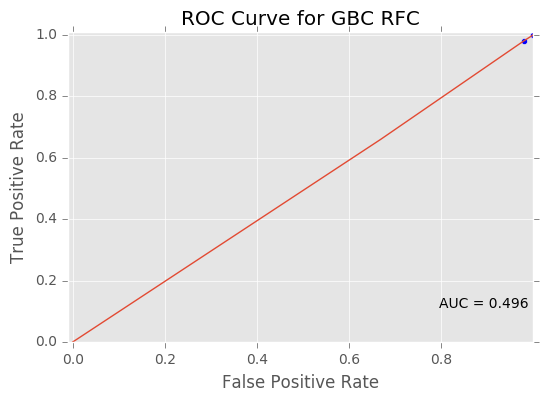

all   score: 0.860  baseline: 0.860   prec: nan   f1: 0.925  | test score 0.863  prec nan f1 0.000  GP -230MM
2011  score: 0.904  baseline: 0.904   prec: nan   f1: 0.949  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.867  prec nan
2013  score: 0.830  baseline: 0.830   prec: nan   f1: 0.907  | test score 0.837  prec nan


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [10]:
eval_model_by_year(lambda: GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1),
                    x = count_cols_bool_train, x_test = count_cols_bool_test, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                  profit_data_test = x_nlp_test, model_name='GBC RFC')

#### Full Document-Term Matrix (Reduced with PCA)

/Users/davidmodjeska/anaconda/lib/python2.7/site-packages/pandas/core/internals.py:227: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 84854 but corresponding boolean dimension is 21485
  return self.values[slicer]
/Users/davidmodjeska/anaconda/lib/python2.7/site-packages/pandas/indexes/base.py:1275: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 84854 but corresponding boolean dimension is 21485
  result = getitem(key)


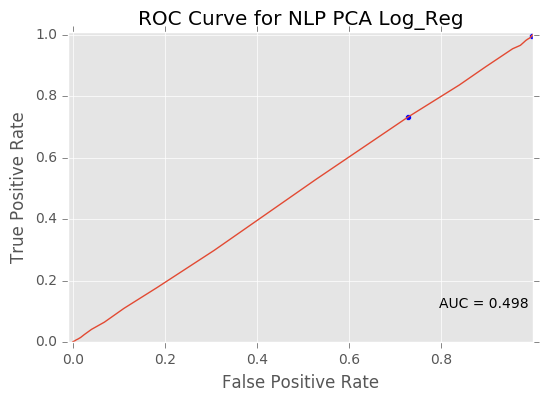

all   score: 0.859  baseline: 0.860   prec: 0.910   f1: 0.924  | test score 0.862  prec 0.905 f1 0.002  GP -236MM
2011  score: 0.899  baseline: 0.904   prec: 0.960   f1: 0.947  | test score 0.890  prec 0.889
2012  score: 0.863  baseline: 0.866   prec: 0.905   f1: 0.927  | test score 0.864  prec 0.861
2013  score: 0.830  baseline: 0.830   prec: 0.833   f1: 0.907  | test score 0.837  prec 0.556


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
eval_model_by_year(lambda: Log_Reg(), x = desc_matrix_pca, x_test = desc_matrix_test_pca, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                   model_name='NLP PCA Log_Reg')

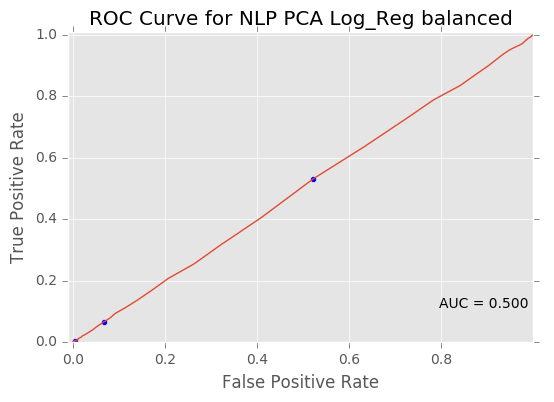

all   score: 0.526  baseline: 0.860   prec: 0.857   f1: 0.659  | test score 0.524  prec 0.860 f1 0.607  GP 21MM
2011  score: 0.606  baseline: 0.904   prec: 0.906   f1: 0.744  | test score 0.604  prec 0.902
2012  score: 0.526  baseline: 0.866   prec: 0.868   f1: 0.663  | test score 0.528  prec 0.870
2013  score: 0.528  baseline: 0.830   prec: 0.831   f1: 0.657  | test score 0.530  prec 0.833


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [12]:
eval_model_by_year(lambda: Log_Reg(class_weight = 'balanced'), x = desc_matrix_pca, x_test = desc_matrix_test_pca, 
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                   model_name='NLP PCA Log_Reg balanced')

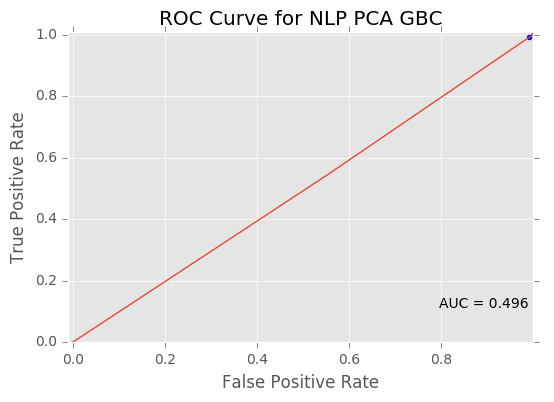

all   score: 0.860  baseline: 0.860   prec: nan   f1: 0.925  | test score 0.863  prec nan f1 0.000  GP -237MM
2011  score: 0.903  baseline: 0.904   prec: nan   f1: 0.949  | test score 0.893  prec nan
2012  score: 0.866  baseline: 0.866   prec: nan   f1: 0.928  | test score 0.867  prec 1.000
2013  score: 0.830  baseline: 0.830   prec: nan   f1: 0.907  | test score 0.837  prec nan


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=2, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [13]:
eval_model_by_year(lambda: GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1),
                   x = desc_matrix_pca, x_test = desc_matrix_test_pca,
                   y = y_nlp_train, y_test = y_nlp_test, years = years_nlp, years_test = years_nlp_test,
                   model_name='NLP PCA GBC')

## Stacking

In [ ]:
class Stacking(object):
    
    def __init__(self, unfitted_combiner, component_type = 'mixed'):
        self.combiner = unfitted_combiner
        self.model_stack = None   
        
        stack = []
        
        # logistic regression component models with various class weights
        if component_type == 'log_reg':
            for diff in np.arange(0, 5, 0.5):
                weight_dict = { 0 : 1, 1 : (1 + diff) }
                stack.append([Log_Reg(C = 1, class_weight = weight_dict), 'Log_Reg ' + str(1 + diff)])
                
        # default - mixed component models
        else:
            stack.append((Log_Reg(C = 10 ** -5), 'Log_Reg'))
            stack.append((Log_Reg(C = 10 ** -5, class_weight = 'balanced'), 'Log_Reg balanced'))
            stack.append((LDA(shrinkage = 1, solver = 'eigen'), 'LDA'))
            stack.append((QDA(reg_param = 1), 'QDA'))
            stack.append((RFC(random_state=1729, n_estimators = 10, max_depth = 4), 'RF'))
            stack.append((RFC(random_state=1729, n_estimators = 300, max_depth = 5, class_weight = 'balanced'),
                        'RF balanced'))
            stack.append((GBC(n_estimators = 10, max_depth = 2, learning_rate = 0.1), 'Boost'))
            stack.append((DTC(max_depth = 10, max_features = 'log2', criterion = 'gini'), 'Tree 1'))
            stack.append((DTC(max_depth = 20, max_features = 'sqrt', criterion = 'entropy'), 'Tree 2'))
            stack.append((DTC(max_depth = 20, max_features = None, criterion = 'entropy'), 'Tree 3'))
            stack.append((DTC(max_depth = 30, max_features = None, criterion = 'gini'), 'Tree 4'))      
            #stack.append(SVC(class_weight = 'balanced')) # slow
                         
        self.model_stack = pd.DataFrame(stack, columns = ['Model_Params', 'Model'])
        self.num_models = len(self.model_stack)
    
    def _predict_component_models(self, X):
        n = X.shape[0]
        y_hat_stack = np.zeros((n, self.num_models))
        for index in range(self.num_models):
            y_hat_stack[:, index] = self.model_stack.iloc[index, 0].predict(X)
        return y_hat_stack
        
    def fit(self, X, y):
        for index in range(self.num_models):
            self.model_stack.iloc[index, 0].fit(X, y)
        y_hat_stack = self._predict_component_models(X)
        self.combiner = self.combiner.fit(y_hat_stack, y)
        return self
        
    def score(self, X, y):
        y_hat_stack = self._predict_component_models(X)
        score = self.combiner.score(y_hat_stack, y)
        return score
              
    def predict(self, X):
        y_hat_stack = self._predict_component_models(X)
        y_hat = self.combiner.predict(y_hat_stack)
        return y_hat
    
    def predict_proba(self, X):
        y_hat_stack = self._predict_component_models(X)
        y_hat_proba = self.combiner.predict_proba(y_hat_stack)
        return y_hat_proba
    
    def confusion_matrix(self, y, y_hat):
        return confusion_matrix(y, y_hat)
     
    def f1_score(self, y, y_hat):
        return f1_score(y, y_hat, pos_label = 1)
    
    def get_features(self):
        long_name = str(type(self.combiner))
        short_name = re.sub('.*\.', '', long_name)
        short_name = re.sub('\'>', '', short_name)
        
        index = index = self.model_stack.iloc[:, 1]
        if short_name == 'LogisticRegression':
            return pd.DataFrame(self.combiner.coef_.T, index = index)
        else:
            return pd.DataFrame(self.combiner.feature_importances_.T, index = index)

In [ ]:
def print_stacking_features(x_train, y_train, x_test, y_test, combiner, component_type = 'mixed'):
    model = Stacking(combiner, component_type)
    model.fit(x_train, y_train)
    
    features = model.get_features()
    features.columns = ['Importance']
    features['Abs'] = np.abs(features.Importance)
    features = features.sort_values('Abs', ascending = False).drop('Abs', axis = 1)
    display(features)

#### Regular Data

In [ ]:
combiner = Log_Reg(C = 1, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
eval_model_by_year(lambda: Stacking(combiner), model_name = "Stack LogReg balanced (mixed)")

In [ ]:
combiner = Log_Reg(C = 1, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
eval_model_by_year(lambda: Stacking(combiner, 'log_reg'), model_name = "Stack LogReg balanced (logreg)")

In [ ]:
combiner = RFC(random_state=1729, n_estimators = 10, max_depth = 4, max_features = 'sqrt', 
               criterion = 'gini', class_weight = 'balanced')
eval_model_by_year(lambda: Stacking(combiner), model_name = "Stack RF balanced (mixed)")

In [ ]:
combiner = RFC(random_state=1729, n_estimators = 10, max_depth = 4, max_features = 'sqrt', 
               criterion = 'gini', class_weight = 'balanced')
eval_model_by_year(lambda: Stacking(combiner, 'log_reg'), model_name = "Stack RF balanced (logreg)")

In [ ]:
combiner = DTC(max_depth = 10, max_features = 'log2', class_weight = 'balanced', 
                           criterion = 'gini')
eval_model_by_year(lambda: Stacking(combiner), model_name = "Stack Tree balanced (mixed)")

In [ ]:
combiner = DTC(max_depth = 10, max_features = 'log2', class_weight = 'balanced', 
                           criterion = 'gini')
eval_model_by_year(lambda: Stacking(combiner, 'log_reg'), model_name = "Stack Tree balanced (logreg)")

#### Stacking Feature Importances

In [ ]:
combiner = Log_Reg(C = 1, class_weight = 'balanced', penalty = 'l2', solver = 'liblinear')
print_stacking_features(x_expanded, y, x_test_expanded, y_test, combiner, 'mixed')

In [ ]:
combiner = RFC(random_state=1729, n_estimators = 10, max_depth = 4, max_features = 'sqrt', 
               criterion = 'gini', class_weight = 'balanced')
print_stacking_features(x_expanded, y, x_test_expanded, y_test, combiner, 'mixed')

In [ ]:
combiner = DTC(max_depth = 10, max_features = 'log2', class_weight = 'balanced', 
                           criterion = 'gini')
print_stacking_features(x_expanded, y, x_test_expanded, y_test, combiner, 'mixed')

## Visualizations

In [ ]:
pd.DataFrame(model_performance).T.sort_values('test_prec', ascending=False)

In [ ]:
model_performance_df = pd.DataFrame(model_performance).T
for col in model_performance_df.columns:
    model_performance_df[col].sort_values().plot(kind='barh')
    plt.title(col)
    plt.show()

### Profit

In [ ]:
# calculate profits
revenues = profit_data_train.total_rec_int + profit_data_train.total_rec_prncp + \
        profit_data_train.total_rec_late_fee + profit_data_train.recoveries
costs = profit_data_train.loan_amount
profit_data_train.actual_profit = revenues - costs

In [ ]:
profit_ratio = np.where(y, 1.0, revenues / (profit_data_train.installment * 36))
plt.hist(profit_ratio, bins=40)

In [ ]:
from sklearn.linear_model import RidgeCV
np.random.seed(1729)
train_flags_ridge = np.random.random(len(x_expanded)) < 0.7

ridge_profit = RidgeCV().fit(x_expanded.iloc[train_flags_ridge, :], profit_ratio[train_flags_ridge])
print "Alpha:", ridge_profit.alpha_
print "Train R^2:", ridge_profit.score(x_expanded.iloc[train_flags_ridge, :], profit_ratio[train_flags_ridge])
print "Test R^2:", ridge_profit.score(x_expanded.iloc[~train_flags_ridge, :], profit_ratio[~train_flags_ridge])

In [ ]:
# print summary revenue and cost
print "REVENUES"
print "Total interested received =", profit_data.total_rec_int.sum() / float(10 ** 6)
print "Total principal received =", profit_data.total_rec_prncp.sum() / float(10 ** 6)
print "Total late fees received =", profit_data.total_rec_late_fee.sum() / float(10 ** 6)
print "Recoveries =", profit_data.recoveries.sum() / float(10 ** 6)
print
print "COSTS"
print "Total loan amounts =", profit_data.loan_amount.sum() / float(10 ** 6)

In [ ]:
### fit and score for profits

predictors = x_expanded_pca
response = profit_data_train.actual_profit > 0

np.random.seed(1729)
train_flags = np.random.random(predictors.shape[0]) < 0.7
local_x_train = predictors.iloc[train_flags, :]
local_y_train = response[train_flags]
local_x_test = predictors.iloc[~train_flags, :]
local_y_test = response[~train_flags]

model = Lin_Reg().fit(local_x_train, local_y_train)
local_test_score = model.score(local_x_test, local_y_test)
print "R-squared on local test set =", local_test_score

In [ ]:
### fit and score for classification

predictors = x_expanded_pca
response = profit_data_train.actual_profit > 0

np.random.seed(1729)
train_flags = np.random.random(predictors.shape[0]) < 0.7
local_x_train = predictors.iloc[train_flags, :]
local_y_train = response[train_flags]
local_x_test = predictors.iloc[~train_flags, :]
local_y_test = response[~train_flags]

model = Log_Reg(class_weight = 'balanced').fit(local_x_train, local_y_train)
local_test_score = model.score(local_x_test, local_y_test)
print "Accuracy on local test set =", local_test_score
local_test_y_hat = model.predict(local_x_test)
local_test_precision = local_y_test[local_test_y_hat].mean()
print "Precision on local test set =", local_test_precision

In [ ]:
### fit and predict for classification

model2 = Log_Reg(class_weight = 'balanced').fit(x_expanded_pca, y)
y_predict_train = pd.DataFrame(model2.predict(x_expanded_pca))
y_predict_test = pd.DataFrame(model2.predict(x_test_expanded_pca))

y_predict_train.index = x_expanded_pca.index
y_predict_test.index = x_test_expanded_pca.index

In [ ]:
eval_model_by_year(lambda: Log_Reg(class_weight = 'balanced'), x = y_predict_train, x_test = y_predict_test)

In [ ]:
eval_model_by_year(lambda: RFC(class_weight = 'balanced'), x = y_predict_train, x_test = y_predict_test)

# Regression modeling for payback ratio

In [ ]:
returns = data_filtered[['loan_status', 'loan_amount', 'installment',
                         'total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 
                     ]]
returns['expected_payment'] = returns.installment * 36
returns['total_paid'] = returns.total_rec_int + returns.total_rec_late_fee + returns.total_rec_prncp
returns['ratio'] = np.where(returns.loan_status,
                            1.0,
                            returns['total_paid'] / returns['expected_payment'])
# Plot distribution
returns.groupby(returns.loan_status).ratio.hist(bins=40)
plt.title("Using Time Value")
plt.show()

In [ ]:
returns_train = returns.ratio[sample_flags]
returns_test = returns.ratio[~sample_flags]

In [ ]:
linear_returns_model = RidgeCV().fit(x_expanded, returns_train)
print linear_returns_model.score(x_test_expanded, returns_test)

In [ ]:
lin_predict = linear_returns_model.predict(x_test_expanded)
for p in np.arange(0.7, 1.2, 0.1):
    yhat_lin = lin_predict >= p
    print p, ';  F1=', f1_score(y_test, yhat_lin, pos_label=1), ';  prec=',y_test[yhat_lin].mean()
    print confusion_matrix(y_test, yhat_lin)

In [ ]:
class PredictWrapper():
    def __init__(self, m):
        self.m = m
    def predict_proba(self, X):
        p = self.m.predict(X)
        return np.hstack((p, (1-p))).reshape(len(p), 2)

In [ ]:
ROC_plot(PredictWrapper(linear_returns_model), x_test_expanded, y_test, "Linear Model")

In [ ]:
linear_returns_model = RidgeCV().fit(cross_terms(x_expanded, 3), returns_train)
print linear_returns_model.score(cross_terms(x_test_expanded, 3), returns_test)

In [ ]:
from sklearn.linear_model import LassoCV
np.random.seed(1729)
linear_returns_model = LassoCV().fit(cross_terms(x_expanded, 3), returns_train)
print linear_returns_model.score(cross_terms(x_test_expanded, 3), returns_test)

In [ ]:
linear_returns_model = Lin_Reg().fit(x_expanded, returns_train)
print linear_returns_model.score(x_test_expanded, returns_test)

In [ ]:
for p in range(2,10):
    linear_returns_model = RidgeCV().fit(cross_terms(x_expanded, p), returns_train)
    print p, linear_returns_model.score(cross_terms(x_test_expanded, p), returns_test)

## Just for comparison, how does loan_subgrade do?

In [ ]:
x_with_subgrade = x_expanded.copy()
x_with_subgrade['subgrade'] = data_filtered.loan_subgrade[x_with_subgrade.index]
x_with_subgrade_test = x_test_expanded.copy()
x_with_subgrade_test['subgrade'] = data_filtered.loan_subgrade[x_with_subgrade_test.index]

In [ ]:
# Compare log reg cv balanced with subgrade as an available predictor
logregcv_model_with_subgrade = eval_model_all_years(lambda: Log_Reg_CV(class_weight='balanced'), 
                                                    model_name='LogReg_CV balanced w/subgrade',
                                                    x = x_with_subgrade,
                                                    x_test = x_with_subgrade_test
                                                 )

# We want to know what value of C was selected by the cross-validation
print "C=", logregcv_model_with_subgrade.C_[0]

In [ ]:
# And we want to know which predictors are important; we do this by sorting them
# by the absolute value of their coefficients
lr_coeff = pd.DataFrame(logregcv_model_with_subgrade.coef_.T, index=x_with_subgrade.columns)
lr_coeff.columns = ['coeff']
lr_coeff['abs'] = lr_coeff.coeff.abs()
plt.figure(figsize=(15,15))
lr_coeff.sort_values('abs', ascending=False).coeff[0:40][::-1].plot(kind='barh')
plt.show()
lr_coeff.sort_values('abs', ascending=False).coeff